In [1]:
## processing
import numpy as np
import pandas as pd

## custom package
import tregs

## visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

# pboc plotting style
tregs.mpl_pboc.plotting_style()

{'green': '#7AA974',
 'light_green': '#BFD598',
 'pale_green': '#DCECCB',
 'yellow': '#EAC264',
 'light_yellow': '#F3DAA9',
 'pale_yellow': '#FFEDCE',
 'blue': '#738FC1',
 'light_blue': '#A9BFE3',
 'pale_blue': '#C9D7EE',
 'red': '#D56C55',
 'light_red': '#E8B19D',
 'pale_red': '#F1D4C9',
 'purple': '#AB85AC',
 'light_purple': '#D4C2D9',
 'dark_green': '#7E9D90',
 'dark_brown': '#905426'}

### Testing on simulated lacI data

In [2]:
fpath = '../../data/synthetic_datasets/lacI_synthetic_dataset.csv'
df_lacI = pd.read_csv(fpath)
df_lacI.head()

,seq,pbound,ct_0,ct_1,norm_ct_1
0,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.086392,2.0,18.0,9.000000
1,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.023676,1.0,3.0,3.000000
2,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.025276,3.0,8.0,2.666667
3,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.018857,19.0,36.0,1.894737
4,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.001787,14.0,3.0,0.214286


In [3]:
wtseq = 'ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGGAATTGTGAGCGGATAACAATTTCACACAGGAAACAGCTATGACCA'

In [11]:
df_lacI = df_lacI[df_lacI.ct_0 != 0.0]
df_lacI['norm_ct_1'] = df_lacI['ct_1'] / df_lacI['ct_0']

n_seqs = len(df_lacI)
mut_list = df_lacI['seq'].values
mu_data = df_lacI['norm_ct_1'].values

In [12]:
windowsize=5
exshift_list = tregs.footprint.get_expression_shift(mut_list, mu_data, wtseq, smoothed=True, windowsize=windowsize)

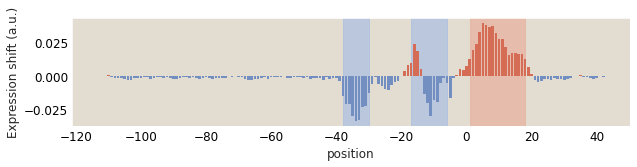

In [13]:
fig, ax = plt.subplots(figsize=(10,2))

ax.axvspan(76 - 114, 84 - 114, alpha=0.7, color='#A9BFE3')
ax.axvspan(97 - 114, 108 - 114, alpha=0.7, color='#A9BFE3')
ax.axvspan(115 - 114, 132 - 114, alpha=0.7, color='#E8B19D')

cut = int((windowsize - 1) / 2)
x = np.arange(-115 + cut, 45 - cut)
shiftcolors = [('#D56C55' if exshift > 0 else '#738FC1') for exshift in exshift_list]
ax.bar(x, exshift_list, color=shiftcolors, edgecolor=None, linewidth=0)

ax.set_ylabel('Expression shift (a.u.)', fontsize=12)
ax.set_xlabel('position', fontsize=12)
plt.show()

### Expression shift matrices

In [12]:
import numpy as np
import pandas as pd


def make_int(x):
    dict = {'A': 1, 'C': 2, 'G': 3, 'T': 4}
    return [dict[y] for y in x]

def expression_shift(_df, wt_seq):
    df = _df.copy()

    df['seq'] = df['seq'].str.upper()
    
    if 'int_seq' not in df.columns:
        df['int_seq'] = df['seq'].apply(make_int)

    def is_mut(x):
        return x != wt_seq

    df['is_mutated'] = df['int_seq'].apply(is_mut)
    mean_rel_counts = df['norm_ct_1'].mean()

    ex_shift_arr = np.zeros(160)
    for x, seq in zip(df['norm_ct_1'], df['is_mutated']):
        print(x, seq)
        ex_shift_arr[seq] += (x - mean_rel_counts) / mean_rel_counts

    exshift_list = []
    for position in range(len(wt_seq)):
        ex_shift = np.zeros(4)
        for i_seq in range(n_seqs):
            ex_shift += all_mutarr[i_seq][position] * (mu_data[i_seq] / avg_mu - 1)
        ex_shift /= n_seqs
        exshift_list.append(ex_shift)
    
    ex_shift_arr /= len(df)
    return ex_shift_arr

In [13]:
expression_shift(df_lacI, wtseq)

9.0 True
3.0 True
2.6666666666666665 True
1.894736842105263 True
0.2142857142857142 True
0.6666666666666666 True
11.428571428571429 True
2.0 True
1.2727272727272727 True
0.5 True
2.0 True
18.38095238095238 True
11.0 True
6.111111111111111 True
20.0 True
3.111111111111111 True
8.625 True
4.928571428571429 True
1.0909090909090908 True
0.0588235294117647 True
7.142857142857143 True
3.0 True
0.8333333333333334 True
1.1428571428571428 True
5.666666666666667 True
1.6923076923076923 True
9.428571428571429 True
1.3333333333333333 True
13.625 True
0.6153846153846154 True
6.071428571428571 True
8.25 True
0.8888888888888888 True
4.545454545454546 True
10.714285714285714 True
7.916666666666667 True
11.461538461538462 True
0.125 True
1.5 True
14.0 True
3.4 True
4.411764705882353 True
3.125 True
0.2 True
3.125 True
2.5 True
7.833333333333333 True
4.0 True
11.75 True
0.2 True
5.588235294117647 True
0.6 True
2.0 True
1.0 True
2.1052631578947367 True
4.5 True
4.6 True
5.0 True
3.75 True
4.5 True
0.6521

array([3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
       3.40172335e-17, 3.40172335e-17, 3.40172335e-17, 3.40172335e-17,
      